# Understand server utilization

In [1]:
from arcgis.gis import *
from getpass import getpass

In [2]:
password = getpass()
gis = GIS('https://esriwebgis.webgistesting.net/portal/','admin',password)

hosting_server = gis.servers[0]
hosting_server.connection.baseurl

········


'https://ESRIwebgis.webgistesting.net/server/rest/services'

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
usage = hosting_server.usage

In [5]:
usage.url

'https://ESRIwebgis.webgistesting.net/server/admin/usagereports'

In [5]:
server_use_reports = usage.reports
server_use_reports

[UsageReport([('queries',
               [{'metrics': ['RequestMaxResponseTime'],
                 'resourceURIs': ['services/']}]),
              ('reportname', 'Max response times for the last 7 days'),
              ('metadata',
               {'managerReport': True,
                'styles': {'services/': {'color': '#382DF5'}},
                'temp': False,
                'title': 'Max response times for the last 7 days'}),
              ('since', 'LAST_WEEK')]),
 UsageReport([('queries',
               [{'metrics': ['RequestsTimedOut'],
                 'resourceURIs': ['services/']}]),
              ('reportname', 'Timed-out requests for the last 7 days'),
              ('metadata',
               {'managerReport': True,
                'styles': {'services/': {'color': '#2F9400'}},
                'temp': False,
                'title': 'Timed-out requests for the last 7 days'}),
              ('since', 'LAST_WEEK')]),
 UsageReport([('queries',
               [{'metrics': ['Re

In [6]:
report_total_req = server_use_reports[-1].query()
report_total_req

{'report': {'metadata': '{"temp":false,"title":"Total requests for the last 7 days","managerReport":true,"styles":{"services/":{"color":"#D900D9"}}}',
  'report-data': [[{'data': [0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      5,
      724,
      0,
      16,
      0,
      90,
      217,
      0,
      0,
      0,
      21,
      0,
      0,
      48,
      0,
      0,
      0,
      0,
      5,
      0,
      0,
      140,
      330],
     'metric-type': 'RequestCount',
     'resourceURI': 'services/'}]],
  'reportname': 'Total requests for the last 7 days',
  'time-slices': [1488240000000,
   1488254400000,
   1488268800000,
   1488283200000,
   1488297600000,
   1488312000000,
   1488326400000,
   1488340800000,
   1488355200000,
   1488369600000,
   1488384000000,
   1488398400000,
   1488412800000,
   1488427200000,
   1488441600000,
   1488456000000,
   148

In [7]:
data_y = report_total_req['report']['report-data'][0][0]['data']
data_x = [datetime.fromtimestamp(d//1000) for d in report_total_req['report']['time-slices']]

(array([ 736388.,  736389.,  736390.,  736391.,  736392.,  736393.,  736394.]),
 <a list of 7 Text xticklabel objects>)

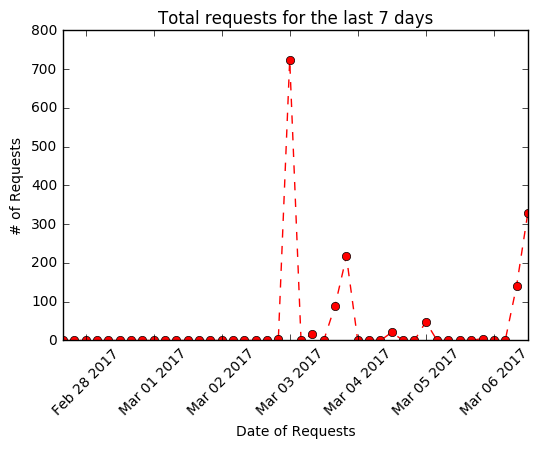

In [8]:
plt.plot(data_x,data_y, marker='o',linestyle='--', color='r', label='Square')
plt.xlabel('Date of Requests')
plt.ylabel('# of Requests')
plt.title("Total requests for the last 7 days")
plt.xticks(rotation = 45)